# Изучение закономерностей, определяющих успешность игр.

Задание. Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Ниже будет проведена предобработка датафрейма, удалены и заполнены пробелы в данных, построены графики, исследованы взаимозависимости показателей, рассчитана корреляция, проверены статистические гипотезы и др. Приступаем.   

## Предобработка и предварительный анализ.

### Описание данных (колонки).
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Дополнение. Коды присваиваются американской организацией ESRB. Присваивание идёт на добровольной основе, значительная часть игр кодов не имеет. Обозначения "от детского к взрослому контенту": EC, E, E10+, T, M, AO и т.н. "ожидающий псевдорейтинг" RP. 

- Несколько замечаний. Продажи даются не в денежном измерении, а в штуках. Кроме того, по каждой игре продажи считаются кумулятивно (нарастающим итогом) с даты релиза игры по настоящее время (2016-й год). 
- Это мешает разделить продажи по играм внутри выделенного периода (вне зависимости от того, когда они были выпущены) и получается, что мы скорее имеем дело не с продажами за год, как обычно принято, а с результатом продаж за весь период существования игры.
- У такой системы отсчёта недостаток следующий: игра, которая последние 5 лет совсем не продаётся, может оставаться наверху продаж, вообще говоря, бесконечно долго, а выделить перспективных, быстрорастущих новичков при такой системе учёта нельзя.  
- Система консервативная, для маркетинга ей недостаёт погодовой раскладки объёмов продаж. В анализе ниже могут употребляться слова "растёт", "падает" - однако значение этих слов точнее выразить как "больше" и "меньше". Например: "на 2016-й год количество проданных игр, выпущенных в 2005-м году (11 лет продаж), меньше, чем количество игр, выпущенных в 2008-м году (8 лет продаж)".

### Шаг 1. Загрузка данных. Гистограммы по колонкам датасета.

In [1]:
# импортируем необходимые для анализа и построения графиков библиотеки 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
from scipy import stats as st

In [2]:
# определим функцию поиска файла в папках Linux и Windows (если тетрадка работает локально)

def file_path(name):
    # считываем дата-файл с попыткой взять данные локально: 4 попытки для Я-сервера и Windows
    # файл должен располагаться рядом с тетрадкой или во вложенном каталоге "datasets" 

    for p in ('/datasets', '', os.path.abspath(""), os.path.abspath("")+'\\datasets\\'):
        pth1 = os.path.join(p, name)
        if os.path.exists(pth1):
            break # если поиск окончился успехом - рвём цикл досрочно
    else:
        pth1 = ''
        print(f'Файл {name} не был найден. Проверьте имя и убедитесь, что он', 
              'присутствует в каталоге рядом с тетрадкой или во вложенной папке "/datasets"')
    print('Чтение данных из:', pth1, '\n')
    return pth1


name = 'games.csv' # имя файла, который надо найти и прочитать    
data = pd.read_csv(file_path(name))  # записываем файл с данными в датафрейм 

Чтение данных из: games.csv 



In [3]:
data.info()   # общая информация по дата-сету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()   # первые 5 строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


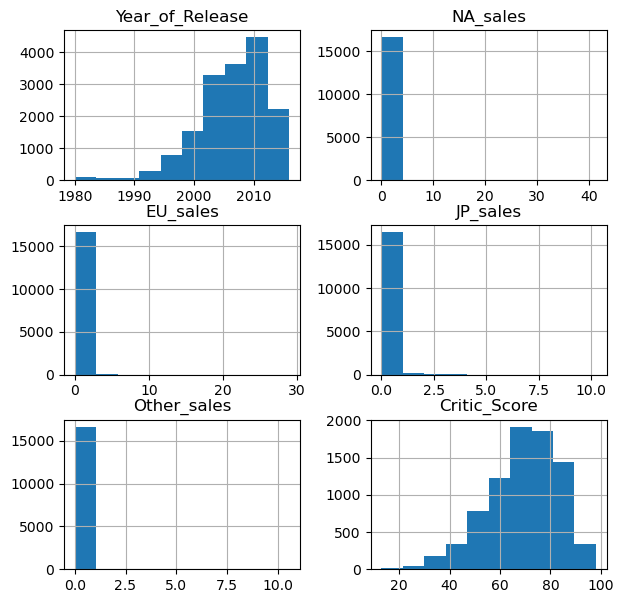

In [5]:
# гистограммы по колонкам

data.hist(figsize=(7, 7))

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 45em; }</style>"))

### Шаг 2. Подготовка данных. Обработка пропусков.

#### Перевод названий столбцов в нижний регистр.

In [6]:
# приводим названия столбцов к нижнему регистру

# data.columns = [col.lower() for col in data.columns]
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Поиск и удаление дубликатов.

In [7]:
data.duplicated().sum()  # количество дубликатов

0

In [8]:
data = data.drop_duplicates() # удаление дубликатов

#### Обработка пропусков данных по играм.

- 232 игры не имеют года выпуска. Восстановить вручную годы выска для 230 игр по википедии очень трудоёмко. Написание программы для автоматического поиска данных в сети и заполнения пробелов выходит за рамки нашего проекта. 
- Наиболее логичная причина отсутствия дат выпуска - игры довольно старые, а статистика по году выпуска добавилась позднее. Однако интернет-поиск по случайно выбранным 10-ти играм даёт годы выпуска 2001, 2002, 2005, 2006, 2007, 2008, 2009, 2011, 2017 - поэтому логичнее предположить какую-то техническую причину отсутствия данных или намеренное затирание данных для учебной задачи этого проекта.

In [9]:
# data[data['year_of_release'].isna()]['name'].nunique()  # количество игр без года выхода
# названия игр без года выхода, обработать все вручную точно не получится
data[data['year_of_release'].isna()]['name'].unique()  

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Прежде, чем работать с пробелами, оценим финансовый вклад игр без года выпуска в датасете.

In [10]:
# доля названий игр, по которым год выпуска пропущен, в общем списке

data[data['year_of_release'].isna()]['name'].nunique()/data['name'].nunique()

0.02007094039276754

In [11]:
# продажи игр по 4-м регионам без года выпуска
# код не сжимаем, функцию не объявляем, т.к. пользоваться всего 2-3 раза

lyears_sales =  \
data[data['year_of_release'].isna()]['na_sales'].sum() +  \
data[data['year_of_release'].isna()]['eu_sales'].sum() +  \
data[data['year_of_release'].isna()]['jp_sales'].sum() +  \
data[data['year_of_release'].isna()]['other_sales'].sum()
lyears_sales

98.92

In [12]:
# продажи без года к продажам по 4-м регионам в целом

lyears_sales / (data['na_sales'].sum() + data['eu_sales'].sum() +
data['jp_sales'].sum() + data['other_sales'].sum())

0.01109502215751746

In [13]:
data['year_of_release'].min(), data['year_of_release'].max()  # минимум и максимум по годам выпуска

(1980.0, 2016.0)

- Наш анализ имеет финансовый характер. Поскольку в финансовом отношении продажи игр без года выпуска составляют 1,1%, а по названиям их тоже мало (около 2%): 
- 1) мы можем сразу удалить эти строки из датафрейма, однако потеря данных нежелательна. 
- 2) заполнить пропуски каким-то произвольным годом выпуска - "2007" или "1985".
- 3) случайно-равномерно заполнить пропуски по диапазону дат в датасете от даты выпуска платформы до 2016 года для каждой игры с пропущенной датой (для сверки с датой выхода платформ понадобятся данные из Википедии). Сделаем это.

In [14]:
# выведем множество платформ, на которых у игр не хватает дат выпуска

lost_pl = set(data[data['year_of_release'].isna()]['platform'].unique())
print(lost_pl)

{'PSP', 'GC', 'PS2', 'GBA', 'X360', 'GB', '2600', 'N64', 'DS', 'PSV', 'PS', 'Wii', 'PS3', '3DS', 'PC', 'XB'}


In [15]:
# Создадим словарь по годам выпуска наиболее популярных платформ (на основе Википедии)
rel_year = {'PS2':2000,'X360':2005,'PS3':2006,'Wii':2006,'DS':2004,'GBA':2001,'PS4':2013,
            'PSP':2004,'NES':1983,'GB':1989,'PS2':2000,'SNES':1990,'3DS':2011,'N64':1996,
            'PS':1994,'XB':2001,'2600':1977,'XOne':2013,'WiiU':2012,'GC':2001,'PSV':2011,       
            'PC':1980}

# платформы с пропусками, не вошедшие в словарь
lost_pl - set(rel_year)

set()

In [16]:
r999 = data[data['year_of_release'].isna()].tail() # последние 5 строк с пропусками (до заполнения)
r999

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.0,0.0,0.0,55.0,5.5,T


In [17]:
data.iloc[[15957, 16400, 16401]]  # артефакт и 2 строки, которые не должны измениться

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.00,0.02,0.0,NaN,NaN,NaN
16400,Tsuyo Kiss 3 Portable,PSP,2012.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN
16401,Championship Manager 2010,PC,2009.0,Sports,0.0,0.01,0.00,0.0,NaN,NaN,NaN


In [18]:
def func(platf, year): # функция для заполнения случайными числами в интервале словарь...2016
    if np.isnan(year):
        return random.randint(rel_year[platf] if platf in rel_year else 1980, 2016)
    else:
        return year   # если не NaN, то оставляем имеющуюся дату выхода

data['year_of_release'] = data.apply(lambda x: func(x.platform, x.year_of_release), axis=1) # заполняем пропуски

In [19]:
data.iloc[[15957, 16400, 16401]]   # артефакт и 2 нормальные строки остались без изменений

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.00,0.02,0.0,NaN,NaN,NaN
16400,Tsuyo Kiss 3 Portable,PSP,2012.0,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN
16401,Championship Manager 2010,PC,2009.0,Sports,0.0,0.01,0.00,0.0,NaN,NaN,NaN


In [20]:
data.iloc[r999.index]  # те же 5 строк после заполнения пропусков, функция отработала нормально

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16373,PDC World Championship Darts 2008,PSP,2014.0,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,2012.0,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,2000.0,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,2012.0,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,2002.0,Role-Playing,0.01,0.0,0.0,0.0,55.0,5.5,T


In [21]:
# чистим артефакты - без пропусков, но неправильные (в пределах платформ, имеющихся в словаре)
for pl in rel_year:  # перебираем словарь
    data.drop(data[(data.platform == pl) & (data.year_of_release < rel_year[pl])].index, inplace=True)

# заранее известный артефакт по индексу 15957, он должен пропасть    
data[(data['platform'] == 'DS') & (data['year_of_release'] < rel_year['DS'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [22]:
# поскольку nan больше нет, мы можем преобразовать тип year_of_release в 'int'

data['year_of_release'] = data['year_of_release'].astype(int)

In [23]:
data.info() # видим, что остаётся несколько пропусков в 'name' и 'genre'            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int32  
 3   genre            16709 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [24]:
# убедимся, что доля продаж с потерянным именем предельно мала

(data[data['name'].isna()]['na_sales'].sum() +  \
data[data['name'].isna()]['eu_sales'].sum() +  \
data[data['name'].isna()]['jp_sales'].sum() +  \
data[data['name'].isna()]['other_sales'].sum()) / \
(data['na_sales'].sum() + data['eu_sales'].sum() +
data['jp_sales'].sum() + data['other_sales'].sum())

0.0002715074271866445

In [25]:
# удаляем строки с пропусками имени и проверяем результат

data.dropna(subset=['name'], inplace=True)
data[data['name'].isna()]['name'].nunique()

0

In [26]:
# доля продаж с потерянным жанром теперь нулевая и не требует удаления:

(data[data['genre'].isna()]['na_sales'].sum() +  \
data[data['genre'].isna()]['eu_sales'].sum() +  \
data[data['genre'].isna()]['jp_sales'].sum() +  \
data[data['genre'].isna()]['other_sales'].sum()) / \
(data['na_sales'].sum() + data['eu_sales'].sum() +
data['jp_sales'].sum() + data['other_sales'].sum())

0.0

#### Обработка пропусков данных по оценкам и рейтингам.

- Рейтинг игры есть у (примерно) 10000 из 16000. 6000 nan (пропуски). Отсутствие рейтинга выглядит нормально, поскольку не все игры выпускаются и/или продаются в США, Мексике и Канаде. Кроме того, рейтинг формально добровольный.
- Коды присваиваются американской организацией ESRB. Обозначения "от детского к взрослому контенту": EC, E, E10+, T, M, AO и т.н. "ожидающий псевдорейтинг" RP. 

In [27]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим на пропуски nan в оценках критиков. Не на все игры пишутся обзоры, т.е. пропуски в этой колонке имеют естесственную причину. 

In [28]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Обратимся к термину 'tbd' в столбце с оценками пользователей. По смыслу аббревиатуры это то, что предстоит уточнить. Для нашей задачи это синоним "nan". Так и поступим.

In [29]:
data.query('user_score == "tbd"')['user_score'].count() # количество строк с tbd до обработки

2424

In [30]:
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', np.nan) # меняем tbd на nan
data.query('user_score == "tbd"')['user_score'].count()  # проверяем остатки

0

#### Дополнительные обработки и преобразования.

Переведём тип 'user_score' во float.

In [31]:
data['user_score'] = data['user_score'].astype(float) # позднее нам понадобится эта колонка как float

Поставим "заглушку" в полях, где ESRB рейтинг отсутствует.

In [32]:
data['rating'].isna().count() # посчитаем строки с осутствующим ESRB рейтингом

16709

In [33]:
data['rating'] = data['rating'].where(data['rating'].notna(), 'no_esrb') # заменим пустые на no_esrb
data['rating'].unique() # проверим результат

array(['E', 'no_esrb', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

#### Создание колонки продаж суммарно по всем регионам.

In [34]:
# создадим новую колонку, в которую занесём сумму продаж из 4-х имеющихся колонок
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# можно использовать вот такой код: = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [35]:
data.head() # проверим визуально, что колонка сумм посчитана верно

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_esrb,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_esrb,31.38


In [36]:
# Служебный код от ревьювера для более детальной проверки остатков 
# temp = data.copy() 
# list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
# print(temp.info())
# for col_l in list_c:
#   print('-'* 25)
#   print(col_l, temp[col_l].sort_values().unique())
#   print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
#         ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

## Исследование.

### Шаг 3. Исследовательский анализ данных.

#### Динамика продаж и количества игр.

Посмотрим, сколько игр выпускалось в разные годы, и важны ли данные за все периоды.

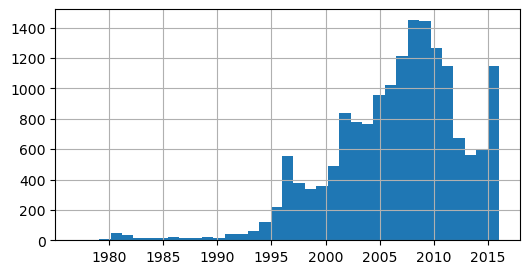

In [37]:
plt.rcParams['figure.figsize'] = [6, 3]
data['year_of_release'].hist(bins=37); # гистограмма 1980-2016г, 37 корзин

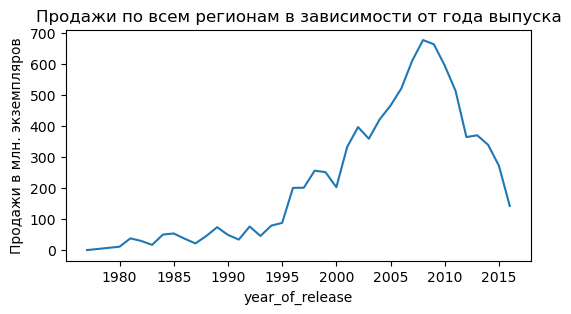

In [38]:
# График продаж по всем регионам в зависимости от года выпуска

plt.title('Продажи по всем регионам в зависимости от года выпуска')
plt.ylabel('Продажи в млн. экземпляров')
plt.xlabel('Годы выпуска игр')
plt.rcParams['figure.figsize'] = [6, 3]
data.groupby('year_of_release')['total_sales'].sum().plot();
plt.show();

- Как видно из 2-х приведённых выше графиков, не только количество игр, но и продажи как таковые, существенно возрастают с года релиза 1995 и достигают максимума для релизов 2009-го года. К настоящему моменту (2016-й год) рынок в финансовом плане падает.
- Период 1980-1995 можно считать этапом плавного развития, а год 1995-й - это старт бума компьютерных игр, который к настоящему году закончился.

#### Продажи по платформам.

Text(0.5, 0, 'Имена платформ')

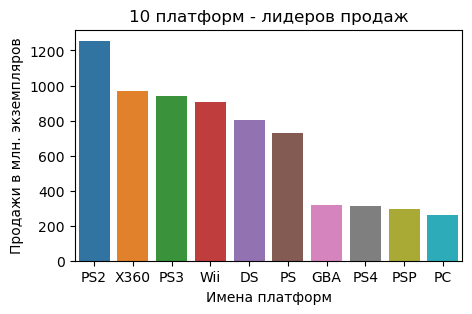

In [39]:
# отберём 10 платформ - лидеров продаж за весь период и построим столбчатую диаграмму

pl_lead = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize = (5, 3))
sns.barplot(x=pl_lead.index, y=pl_lead.values, ci=None);
plt.title('10 платформ - лидеров продаж')
plt.ylabel('Продажи в млн. экземпляров')
plt.xlabel('Имена платформ')

In [40]:
# выберем из датафрейма данные продаж по годам для вышеперечисленных платформ

frm = (data.pivot_table(index=['year_of_release'], columns= 'platform', 
       values='total_sales', aggfunc=['sum'])['sum'][pl_lead.index])
frm.tail()

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
year_of_release,,,,,,,,,,
2012,6.40,99.77,108.32,21.83,11.18,NaN,NaN,NaN,7.69,23.22
2013,0.08,88.65,113.42,12.05,1.80,1.46,NaN,25.99,5.26,12.80
2014,0.17,37.82,47.97,6.90,0.09,NaN,0.11,100.00,0.43,13.28
2015,0.17,12.72,17.45,1.80,0.09,NaN,NaN,118.90,0.12,8.52
2016,5.54,2.10,4.25,4.32,1.00,NaN,0.28,69.25,NaN,5.25


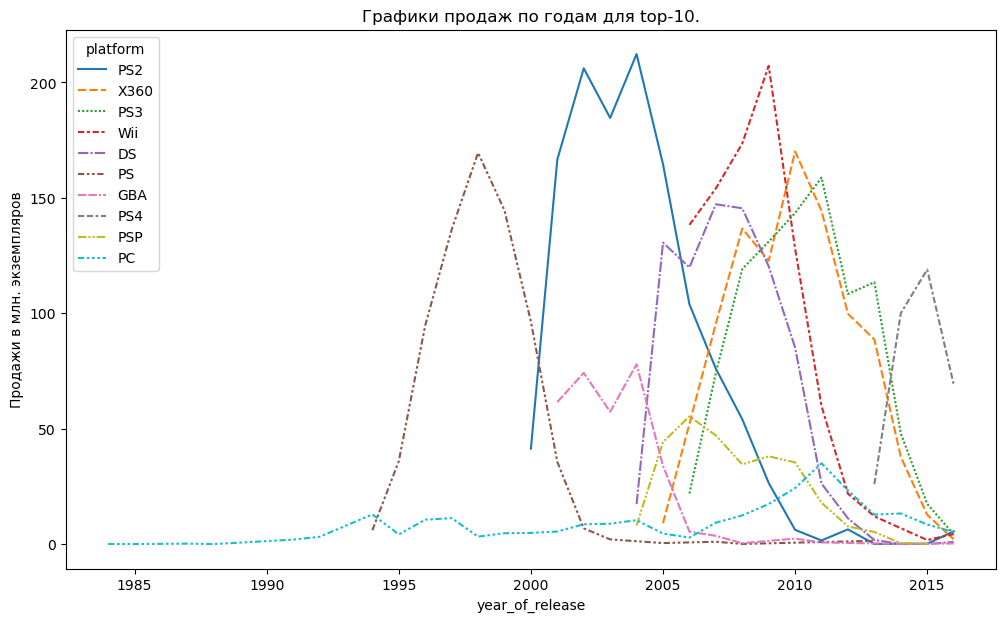

In [41]:
# сформируем график продаж по годам, цвет линий для каждой отобранной платформы - см. легенду 

plt.figure(figsize = (12, 7))   # сделаем размер графика покрупнее
sns.lineplot(data=frm);  # здесь frm - это отфильтрованная ранее сводная таблица
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Графики продаж по годам для top-10.');

- Разберём на примере DS (фиолетовый график), что мы видим. Платформа стартует в 1985-м году, совокупная выручка всех игр внутри этой платформы растёт до 2008-го года: по каждому году мы видим выручку от игр, созданных в этом году, но за период с их создания до конца 2016-го. Чем ближе к 2016-му году, тем меньше лет продаётся игра.
- На графиках отчётливо видны траектории взлётов и падений 10 платформ - лидеров по продажам с 1980-го года. Самая "молодая" из них PS4 (серый пунктир "2тире-точка") тоже находится на излёте. 
- Попробуем "поискать таланты среди молодёжи".

In [42]:
# соберём продажи нелидеров (кроме top-10) вместе, как делали для лидеров

pl_last = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).tail(21)
pl_last

platform
3DS     259.00
XB      256.75
GB      254.03
NES     251.05
N64     218.68
SNES    200.04
GC      198.93
XOne    159.32
2600     96.98
WiiU     82.19
PSV      54.07
SAT      33.59
GEN      28.35
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: total_sales, dtype: float64

In [43]:
# выберем из датафрейма данные продаж по годам для вышеперечисленных платформ

frm = (data.pivot_table(index=['year_of_release'], columns= 'platform', 
       values='total_sales', aggfunc=['sum'])['sum'][pl_last.index])
frm.tail()

platform,3DS,XB,GB,NES,N64,SNES,GC,XOne,2600,WiiU,...,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012,51.55,0.25,NaN,NaN,NaN,NaN,0.54,NaN,NaN,17.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,56.57,0.36,NaN,NaN,NaN,NaN,NaN,18.96,0.52,21.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,43.76,0.58,NaN,NaN,NaN,NaN,0.30,54.07,NaN,22.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,28.62,0.69,NaN,NaN,NaN,NaN,0.29,60.14,NaN,16.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,15.21,NaN,NaN,NaN,NaN,NaN,NaN,26.15,NaN,4.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


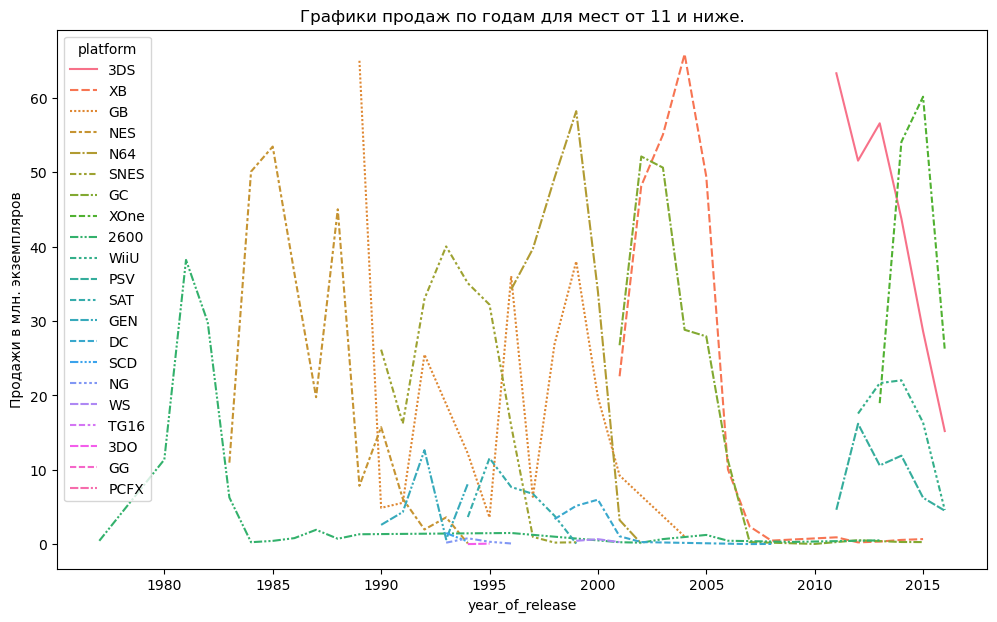

In [44]:
# сформируем график продаж "не top-10" по годам, цвет линий для каждой отобранной платформы - см. легенду 

plt.figure(figsize = (12, 7))   # сделаем размер графика покрупнее
sns.lineplot(data=frm);  # здесь frm - это отфильтрованная ранее сводная таблица
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Графики продаж по годам для мест от 11 и ниже.');

- Среди "отстающих" платформ растущих не наблюдается. Решения для поиска роста внутри уже имеющегося ассортимента найти не удалось.

#### Оценка рынка на 2017-й год.

- Как было показано выше, с 2009-го года рынок падает, а растущих платформ - вне зависимости от их положения в рейтинге продаж - в датафрейме не найдено. 
- Индустрия очень быстро меняется. Введём понятие "актуальный период" - т.е. не будем учитывать игры выпуском до 2014-го года и из оставшихся отберём тех, кто падает медленнее остальных.
- Как упоминалось в п.1.1, разбивки продаж по годам в датафрейме нет, некоторый наклон графиков вниз нормален, поскольку позднее вышедшие игры успевают продаваться в меньших размерах. Угол "нормального" наклона неизвестен, поэтому анализ будет иметь право на ошибку.

Отберём только программы, выпущенные в 2014 году и позднее (т.е. за 3 года).

In [45]:
# создадим новый датафрейм, в котором будут отражены только новые игры, выпущенные
# в 2014-м году или позже

df10 = data.query('year_of_release > 2013')

In [46]:
frm10 = (df10.pivot_table(index=['year_of_release'], columns= 'platform', 
       values='total_sales', aggfunc=['sum'])['sum'])
frm10

platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,
2014,43.76,0.09,0.11,0.30,13.28,0.17,47.97,100.00,0.43,11.90,6.90,22.03,37.82,0.58,54.07
2015,28.62,0.09,NaN,0.29,8.52,0.17,17.45,118.90,0.12,6.25,1.80,16.35,12.72,0.69,60.14
2016,15.21,1.00,0.28,NaN,5.25,5.54,4.25,69.25,NaN,4.51,4.32,4.60,2.10,NaN,26.15


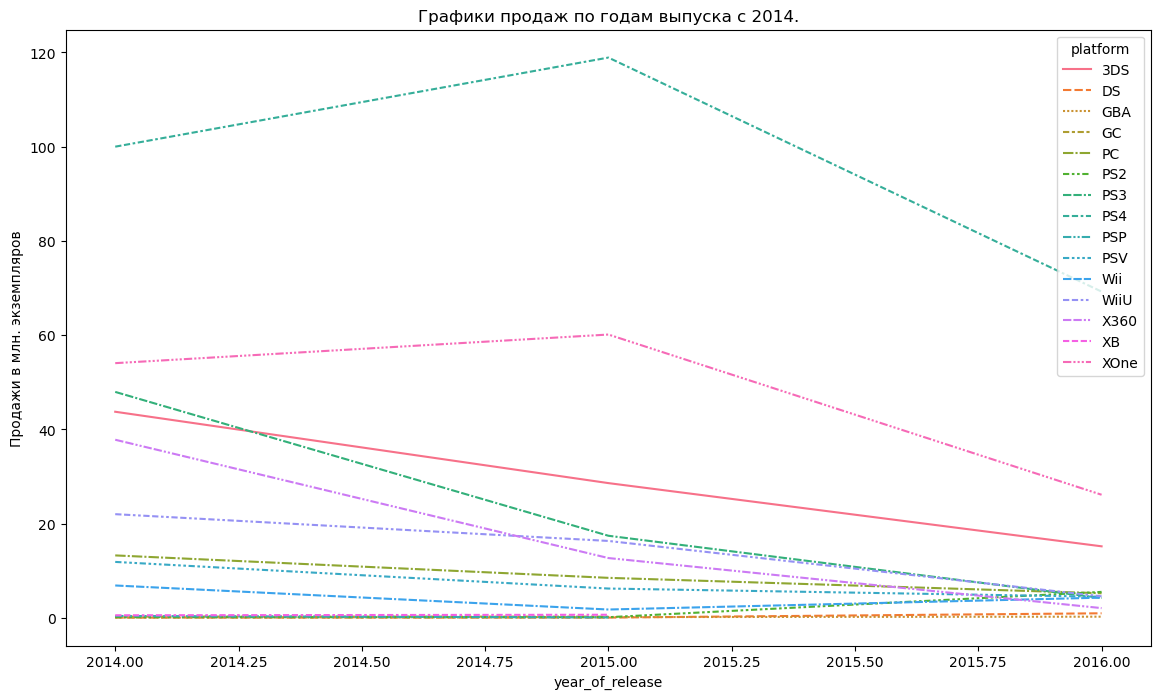

In [47]:
# сформируем график продаж по годам c 2014, цвет линий для каждой отобранной платформы - см. легенду 

plt.figure(figsize = (14, 8))   # сделаем размер графика покрупнее
sns.lineplot(data=frm10);  # здесь frm10 - это отфильтрованная ранее сводная таблица
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Графики продаж по годам выпуска c 2014.');

- Наиболее вероятно, что в следующем году лидерство будет оставаться за платформами PS4 и XOne, но 3DS в ближайшие годы сможет составить им конкуренцию, поскольку её график имеет более пологий вид.
- WiiU росла в периоде 2011-2012 и сравнялась по продажам с PS3. Так что это тоже сильный игрок, который может бороться со следующего года за место в первой тройке.  

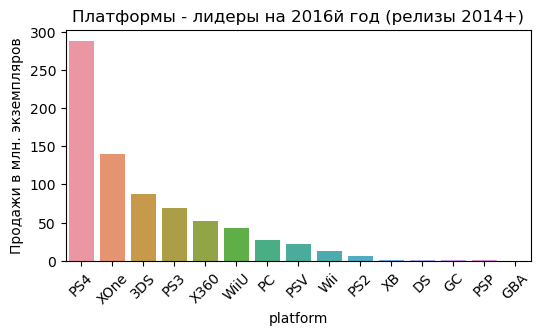

In [48]:
# группируем данные и выводим столбчатую диаграмму

pl = (df10.groupby('platform')['total_sales'].sum().sort_values(ascending=False))
sns.barplot(x=pl.index, y=pl.values, ci=None)
plt.xticks(rotation = 45)
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Платформы - лидеры на 2016й год (релизы 2014+)');
plt.show()

- На падающем с 2009-го года рынке в интервале за 2014-2016е годы релиза игр платформы PS4 и XOne к 2016-му годe имеют по накопительному итогу наибольшее число продаж и могут быть признаны наиболее перспективными.

#### Построение диграмм размаха.

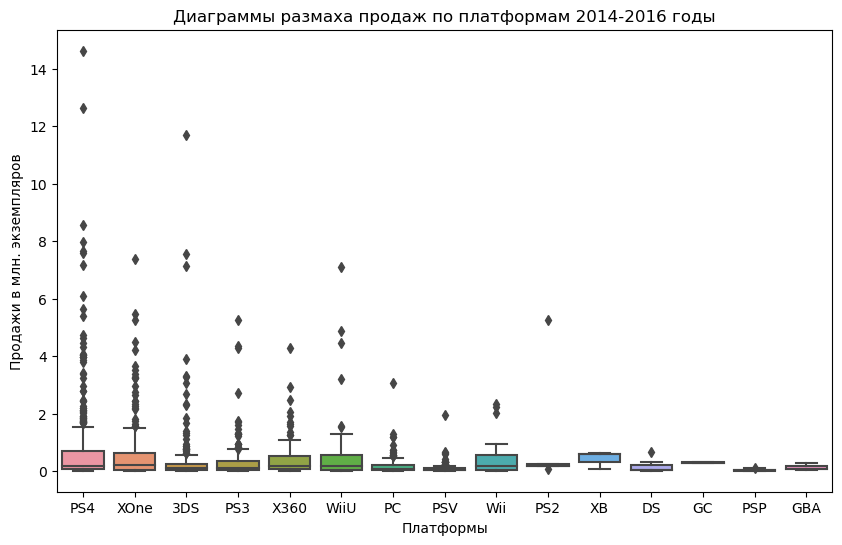

In [49]:
# На основании данных за 2014-2016 годы построим боксплоты, порядок - по убыванию объёмов продаж 2014-2016

plt.figure(figsize = (10, 6))
sns.boxplot(data = df10, x='platform', y='total_sales', order=pl.index) # pl построен в ячейке выше
plt.ylabel('Продажи в млн. экземпляров')
plt.xlabel('Платформы')
plt.title('Диаграммы размаха продаж по платформам 2014-2016 годы');

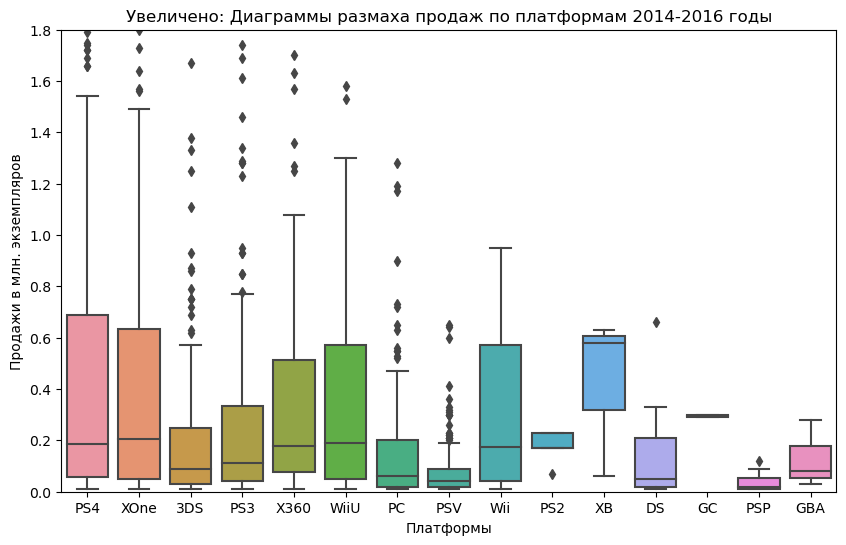

In [50]:
# выводим boxplot ("ящики с усами") с отсечением верхней части

plt.figure(figsize = (10, 6))
plt.ylim([0, 1.8])                      # верх с выбросами отрезаем 
sns.boxplot(data=df10, x ='platform', y ='total_sales', order=pl.index)
plt.ylabel('Продажи в млн. экземпляров')
plt.xlabel('Платформы')
plt.title('Увеличено: Диаграммы размаха продаж по платформам 2014-2016 годы');

- На диаграмме размаха PS4 иXOne имеют большие продажи за счёт выбросов (см. выше диаграмму "Платформы - лидеры на 2016й год (релизы 2014+)"). То есть на них имеются "игры-звёзды", дающие вклад в валовые продажи, а вот вторая половина списка - это стабильные середнячки, уже без выбросов.
- На платформе Wii и WiiU медианное значение довольно высокое для нелидеров, то есть продажи обеспечиваются меньшим количеством при большей цене, аналогично для платформ PS2 и DS.

### Влияние отзывов пользователей и критиков. Корреляция.

#### Корреляция по 9-ти платформам с оценками критиков.

In [51]:
# Для размещения графиков в ячейках 3х3 возьмём 9 верхних платформ-лидеров

list_platforms = df10.groupby('platform')['total_sales'].sum().head(9).index 
list_platforms

Index(['3DS', 'DS', 'GBA', 'GC', 'PC', 'PS2', 'PS3', 'PS4', 'PSP'], dtype='object', name='platform')

In [52]:
%%capture
# подавим вывод из этой ячейки, чтобы с графиками не печаталась служебная информация


def cofunc(pl, ax_n, e_sc, r_sc):     # далее будем вызывать эту функцию
    remarks = df10[df10['platform'] == pl][[e_sc, 'total_sales']]  
    plt.figure(figsize = (2.5,2.5))
    sns.scatterplot(data=remarks, x=e_sc, y='total_sales', s=100, legend=False, ax=ax_n)
    ax_n.set_xlabel(r_sc)
    ax_n.set_ylabel('Продажи млн. штук')
    k = remarks[[e_sc,'total_sales']].corr().round(3)['total_sales'][0]
    ax_n.set_title(f'Платформа {pl}, корреляция {k}');
            

fig_3 = plt.figure(figsize=(15,15)) # размеры поля, куда будут выводиться диаграммы
ax1 = fig_3.add_subplot(3,3,1) # расположение диаграмм в клетках    
ax2 = fig_3.add_subplot(3,3,2)
ax3 = fig_3.add_subplot(3,3,3)
ax4 = fig_3.add_subplot(3,3,4)
ax5 = fig_3.add_subplot(3,3,5)
ax6 = fig_3.add_subplot(3,3,6)
ax7 = fig_3.add_subplot(3,3,7)
ax8 = fig_3.add_subplot(3,3,8)
ax9 = fig_3.add_subplot(3,3,9)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

for i in range(len(list_platforms)):    
    cofunc(pl=list_platforms[i], ax_n=axes[i], e_sc = 'critic_score', r_sc = 'оценки критиков');

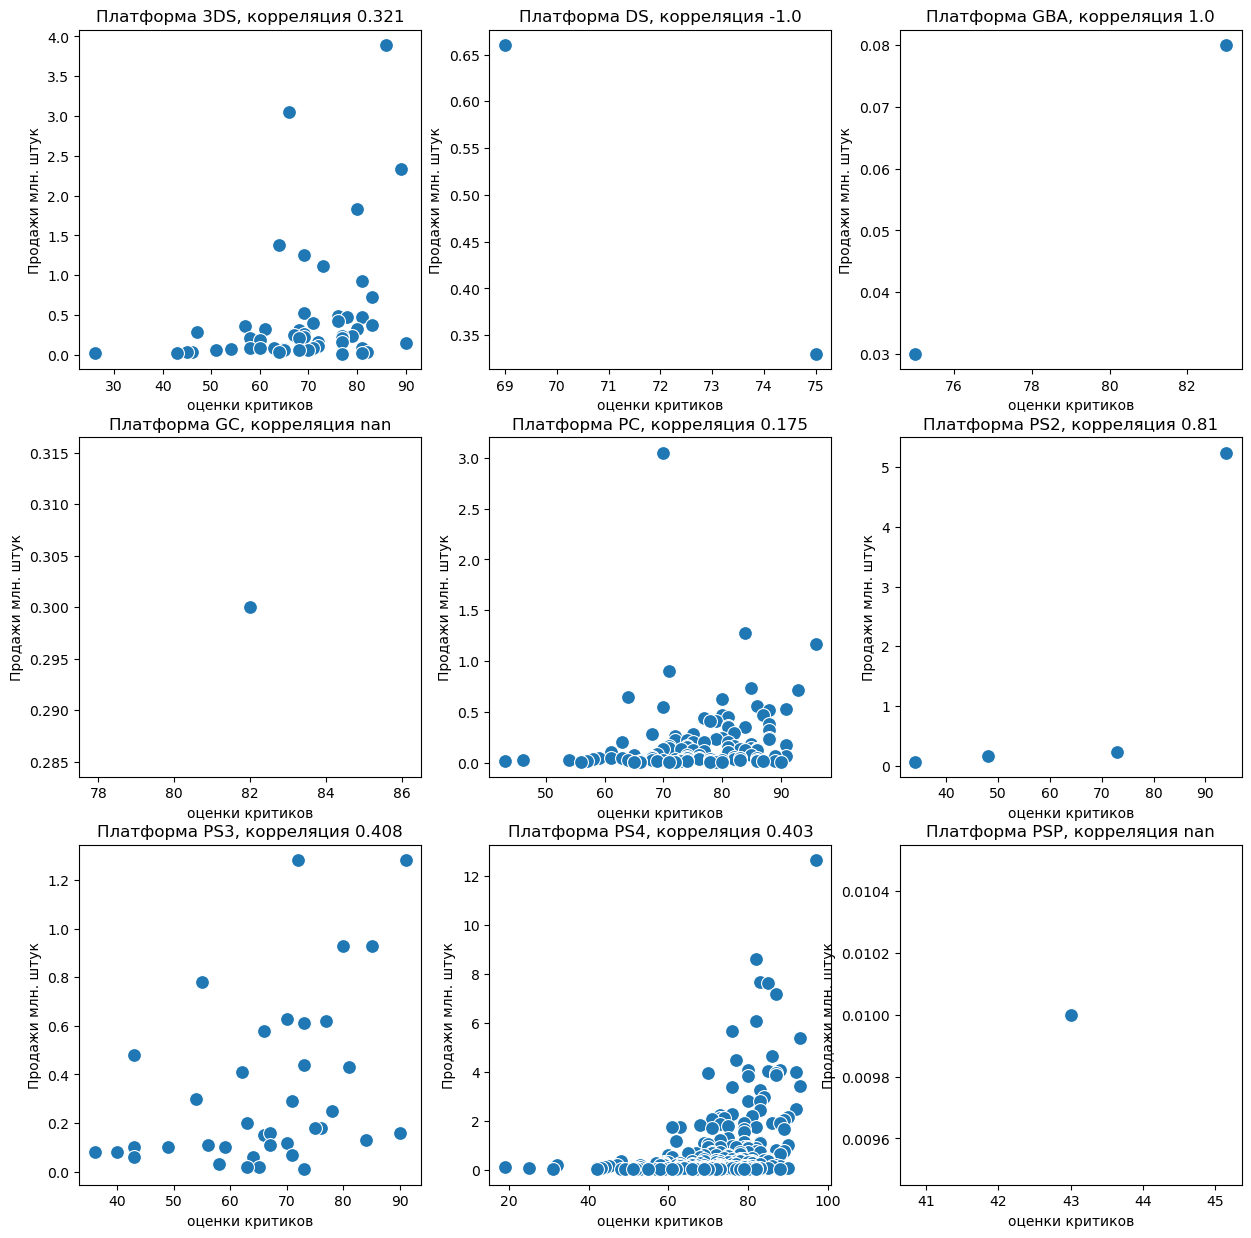

In [53]:
fig_3 # выводим на печать "чистый" график

- Корреляция для 9-ти платформ лидеров продаж в разрезе продажи – оценки критиков. Для GBA, N64, PS данных для расчёта недостаточно. Для платформ DS и PS2 имеется всего по 3 оценки, в первом случае корреляция очень высокая отрицательная, во втором высокая положительная. Для платформ 3DS, PC, PS4, PS3 корреляция продаж с оценками критиков слабая, очень слабая, слабая и средняя.

#### Корреляция по 9-ти платформам с оценками пользователей.

In [54]:
%%capture
# подавим вывод из этой ячейки, чтобы с графиками не печаталась служебная информация


def cofunc(pl, ax_n, e_sc, r_sc):     # далее будем вызывать эту функцию
    remarks = df10[df10['platform'] == pl][[e_sc, 'total_sales']]  
    plt.figure(figsize = (2.5,2.5))
    sns.scatterplot(data=remarks, x=e_sc, y='total_sales', s=100, legend=False, ax=ax_n)
    ax_n.set_xlabel(r_sc)
    ax_n.set_ylabel('Продажи млн. штук')
    k = remarks[[e_sc,'total_sales']].corr().round(3)['total_sales'][0]
    ax_n.set_title(f'Платформа {pl}, корреляция {k}');
            

fig_4 = plt.figure(figsize=(15,15)) # размеры поля, куда будут выводиться диаграммы
ax1 = fig_4.add_subplot(3,3,1) # расположение диаграмм в клетках    
ax2 = fig_4.add_subplot(3,3,2)
ax3 = fig_4.add_subplot(3,3,3)
ax4 = fig_4.add_subplot(3,3,4)
ax5 = fig_4.add_subplot(3,3,5)
ax6 = fig_4.add_subplot(3,3,6)
ax7 = fig_4.add_subplot(3,3,7)
ax8 = fig_4.add_subplot(3,3,8)
ax9 = fig_4.add_subplot(3,3,9)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

for i in range(len(list_platforms)):    
    cofunc(pl=list_platforms[i], ax_n=axes[i], e_sc = 'user_score', r_sc = 'оценки пользователей');

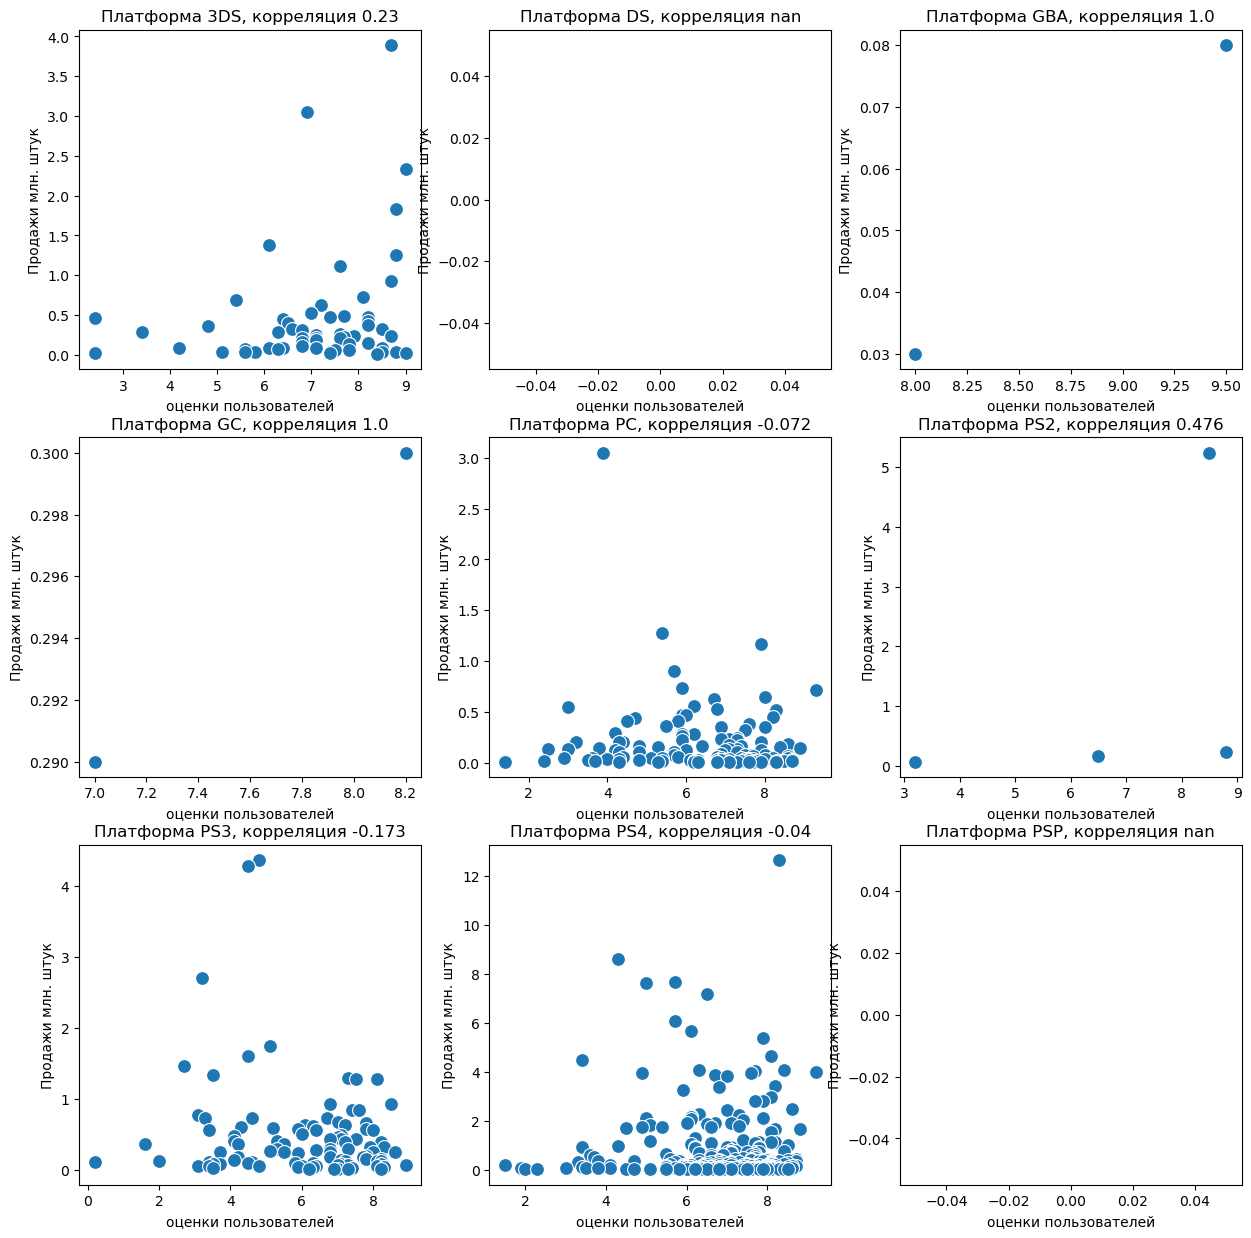

In [55]:
fig_4 # выводим на печать "чистый" график

- Корреляция для 9-ти платформ лидеров продаж в разрезе продажи – оценки пользователей. Для GBA, DS, N64, PS, PS2 данных слишком мало. Для PC, PS3, PS4 корреляция очень слабая, причём отрицательная. Лишь для 3DS корреляция положительная, но тоже очень слабая.

#### Анализ продаж в разрезе жанров по годам выпуска 2014+.

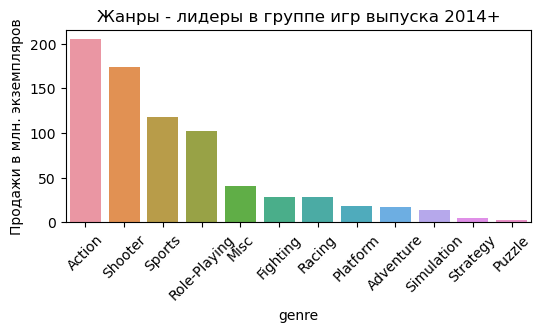

In [56]:
# распечатаем столбчатую диаграмму для сумм продаж по жанрам, отбираем данные

gn = df10.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# задаём размеры для диаграммы
fig, ax = plt.subplots(figsize=(6, 2.5))

plt.ylabel('Продажи в млн. экземпляров')
plt.title('Жанры - лидеры в группе игр выпуска 2014+');
plt.xticks(rotation = 45)

# выводим диаграмму на печать
sns.barplot(x=gn.index, y=gn.values, ax=ax, ci=None)
plt.show()

In [57]:
# группируем данные с учётом жанра (год выпуска 2014+)

fg = df10.pivot_table(index=['genre'], columns='platform', values='total_sales', aggfunc=['sum', 'median'])
fgs = fg['sum'].sort_values(by='WiiU', ascending=False)    # данные по суммам продаж
fgm = fg['median'].sort_values(by='WiiU', ascending=False) # данные по медианам продаж
fg # платформы и жанры, в клетках - продажи, полная таблица


sum                                                          \
platform        3DS    DS   GBA    GC    PC   PS2    PS3    PS4   PSP   PSV   
genre                                                                         
Action        22.46  0.71  0.28  0.29  5.34  0.24  18.20  91.62  0.26  7.47   
Adventure      1.66   NaN   NaN   NaN  0.39   NaN   1.98   6.34  0.05  2.29   
Fighting       8.10   NaN   NaN   NaN  0.10  0.17   2.89   7.73   NaN  0.69   
Misc           3.85  0.03   NaN   NaN  0.05   NaN   6.69   7.77  0.02  3.43   
Platform       3.98   NaN  0.03   NaN  0.06   NaN   1.24   5.42   NaN  0.19   
Puzzle         0.87  0.33  0.08   NaN   NaN   NaN   0.04   0.02   NaN  0.06   
Racing          NaN   NaN   NaN   NaN  0.64   NaN   1.63  10.16   NaN  0.10   
Role-Playing  40.05  0.11   NaN   NaN  4.87   NaN   6.63  28.99   NaN  6.36   
Shooter        0.07   NaN   NaN   NaN  5.79  0.23  12.17  78.46   NaN  0.64   
Simulation     4.43   NaN   NaN   NaN  6.59   NaN   0.46   1.23   NaN  0.05   
Sports         1.34   NaN   NaN  0.30  0.93  5.24  17.68  50.01  0.10  1.20   
Strategy       0.78   NaN   NaN   NaN  2.29   NaN   0.06   0.40  0.12  0.18   

              ... median                                                  \
platform      ...    PS2    PS3    PS4   PSP    PSV    Wii   WiiU   X360   
genre         ...                                                          
Action        ...   0.12  0.100  0.150  0.02  0.040  0.065  0.130  0.160   
Adventure     ...    NaN  0.050  0.070  0.01  0.020  0.180  0.070  0.100   
Fighting      ...   0.17  0.130  0.160   NaN  0.090  0.030  2.940  0.080   
Misc          ...    NaN  0.075  0.060  0.01  0.060  0.550  0.110  0.270   
Platform      ...    NaN  0.295  0.260   NaN  0.020  0.050  0.510  0.095   
Puzzle        ...    NaN  0.040  0.020   NaN  0.030  0.030  0.020  0.140   
Racing        ...    NaN  0.110  0.205   NaN  0.040  0.010  7.090  0.120   
Role-Playing  ...    NaN  0.105  0.200   NaN  0.065    NaN  0.335  0.490   
Shooter       ...   0.23  0.425  0.820   NaN  0.640  1.170  0.370  0.440   
Simulation    ...    NaN  0.070  0.210   NaN  0.010  0.170    NaN  0.205   
Sports        ...   5.24  0.155  0.405  0.05  0.055  0.440  0.410  0.380   
Strategy      ...    NaN  0.060  0.080  0.12  0.035    NaN    NaN  0.350   

                           
platform        XB   XOne  
genre                      
Action        0.63  0.140  
Adventure      NaN  0.060  
Fighting       NaN  0.310  
Misc           NaN  0.180  
Platform       NaN  0.130  
Puzzle         NaN    NaN  
Racing        0.06  0.125  
Role-Playing   NaN  0.320  
Shooter        NaN  0.910  
Simulation     NaN  0.120  
Sports        0.58  0.250  
Strategy       NaN  0.125  

[12 rows x 30 columns]

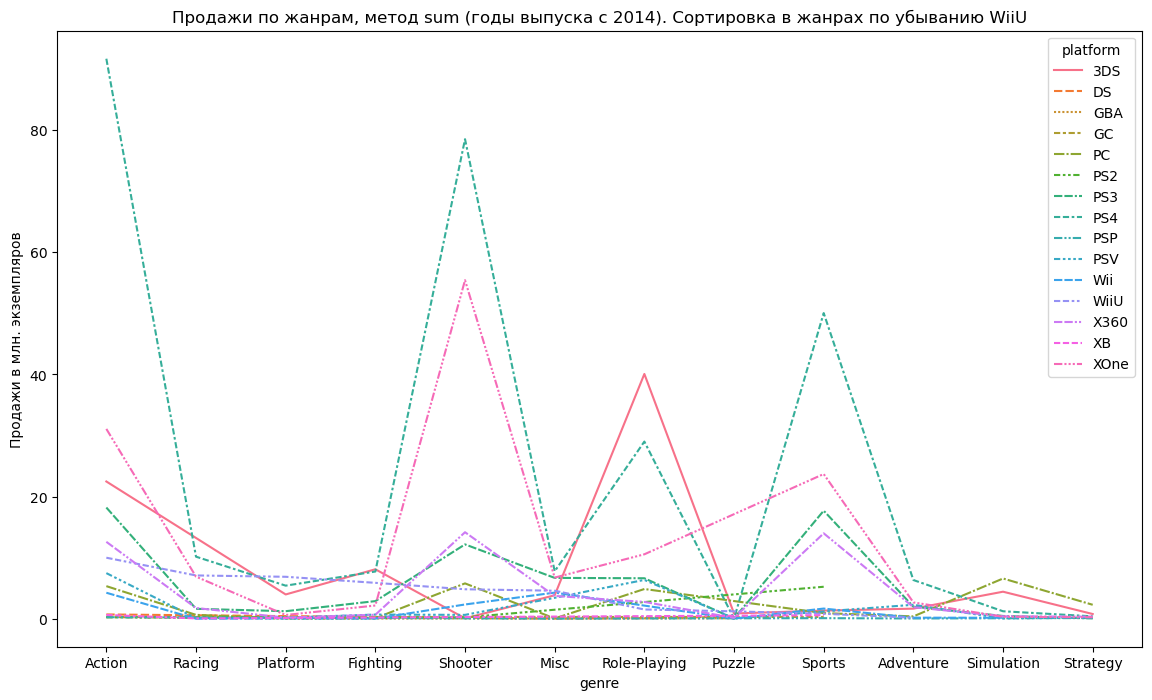

In [58]:
# сформируем график продаж по годам c 2014, цвет линий для каждой отобранной платформы - см. легенду 

plt.figure(figsize = (14, 8))   # сделаем размер графика покрупнее
sns.lineplot(data=fgs);  # здесь fg - это отфильтрованная выше сводная таблица
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Продажи по жанрам, метод sum (годы выпуска c 2014). Сортировка в жанрах по убыванию WiiU');

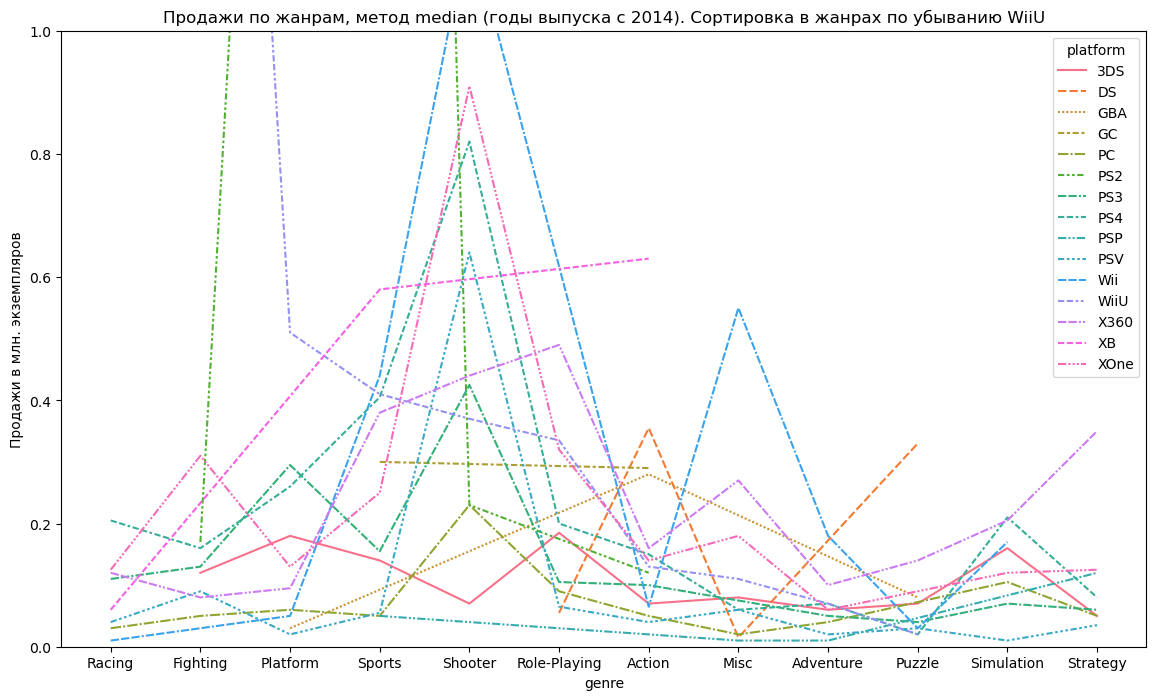

In [59]:
# сформируем график продаж по годам c 2014, цвет линий для каждой отобранной платформы - см. легенду 

plt.figure(figsize = (14, 8))   # сделаем размер графика покрупнее
sns.lineplot(data=fgm);  # здесь fg - это отфильтрованная выше сводная таблица
plt.ylim([0, 1])  # верх с выбросами отрезаем 
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Продажи по жанрам, метод median (годы выпуска c 2014). Сортировка в жанрах по убыванию WiiU');

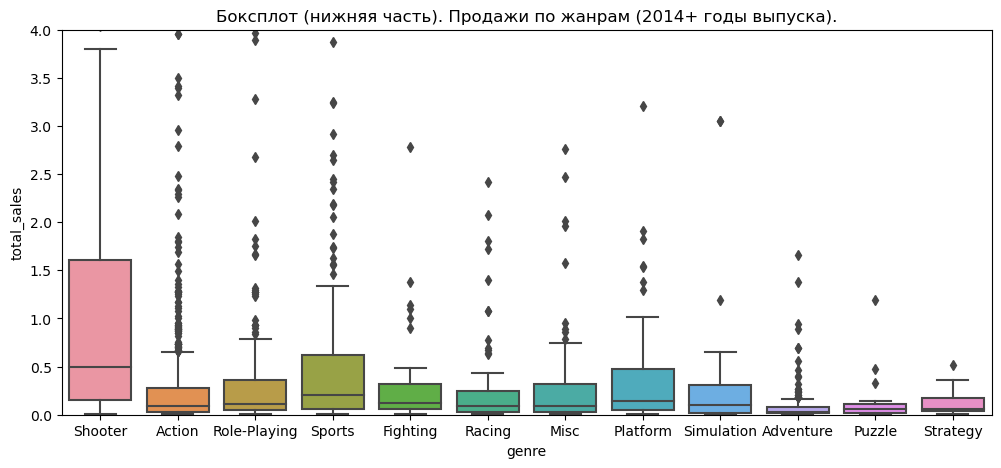

In [60]:
# выводим boxplot ("ящики с усами")

rb = df10[['genre','total_sales']]
plt.figure(figsize = (12, 5))
plt.title('Боксплот (нижняя часть). Продажи по жанрам (2014+ годы выпуска).');
plt.ylim([0, 4])  # верх с выбросами отрезаем 
sns.boxplot(x="genre", y="total_sales", data=rb);

- На диаграмме "ящик с усами" Shooter  в период 2014-2016 года явный лидер, его медиана опережает 3-й квартиль практически у всех других жанров. Далее с заметным отставанием идёт жанр Sports.
- Внутри медиан платформа WiiU лидер в Racing, Fighting, Sports. По Shooter лидер XOne, в жанре  Misc лидер Wii.
- По суммам продаж лидирует жанр Action, Shooter на втором месте. PS4 лидирует по жанрам Action, Shooter, Sports, а в жанре Role-Playing пропускает на первое место 3DS.

### Шаг 4. Портреты пользователей по регионам.

#### Самые популярные платформы (топ-5). 


TOP-5 платформ по 3-м регионам и "остальным" (2014+ годы выпуска)


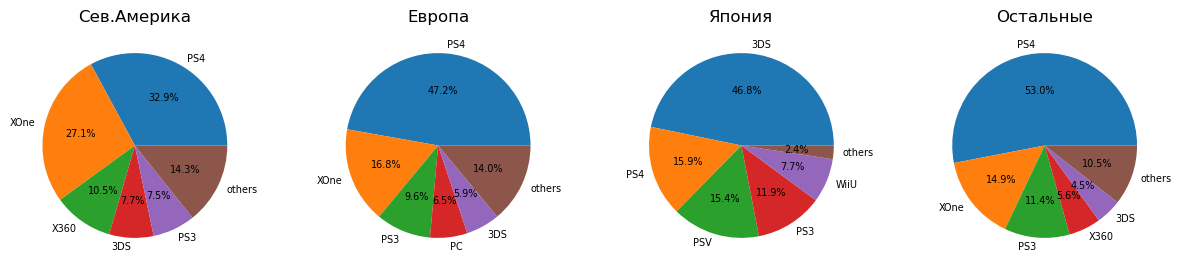

In [61]:
# создаём функцию для группировки данных и выделения из столбцов для диаграмм
def rund(reg_sales): 
    f3 = df10.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], \
                      aggfunc=['sum'])['sum'].sort_values(by=reg_sales, ascending=False)
    r_sales = list(f3[reg_sales])
    s = sum(r_sales[5:])
    r_sales = list(r_sales[:5])
    r_sales.append(s)
    plats = list(f3.index[:5])
    plats.append('others')
    return r_sales, plats


fig_1 = plt.figure(figsize=(15,3)) # размеры поля, куда будут выводиться диаграммы
ax1 = fig_1.add_subplot(1,4,1) # расположение диаграмм в клетках
ax2 = fig_1.add_subplot(1,4,2)
ax3 = fig_1.add_subplot(1,4,3)
ax4 = fig_1.add_subplot(1,4,4)

# вызов функции и взятие из кортежа цифр и платформ
ax1.pie(rund('na_sales')[0], labels=rund('na_sales')[1],autopct='%1.1f%%',textprops={'fontsize':7}) 
ax2.pie(rund('eu_sales')[0], labels=rund('eu_sales')[1],autopct='%1.1f%%',textprops={'fontsize':7})
ax3.pie(rund('jp_sales')[0], labels=rund('jp_sales')[1],autopct='%1.1f%%',textprops={'fontsize':7})
ax4.pie(rund('other_sales')[0], labels=rund('other_sales')[1],autopct='%1.1f%%',textprops={'fontsize':7})

ax1.set_title('Сев.Америка') # заголовки по каждой диаграмме
ax2.set_title('Европа')
ax3.set_title('Япония')
ax4.set_title('Остальные');
print('\nTOP-5 платформ по 3-м регионам и "остальным" (2014+ годы выпуска)');

- В Северной Америке лидирует PS4, на втором месте XOne. В Европе однозначный лидер PS4, за ней с отставанием XOne. В Японии  3DS абсолютный лидер, за ней с отставанием PS4 и PSV. В остальных регионах суммарно лидер PS4 (как в Европе) и за ней с отрывом XOne, а PS3 на 3-м месте. Интересно, что в Японии практически весь рынок разобран под 5 лидеров, others занимают очень малую долю.

#### Самые популярные жанры (топ-5). 


TOP-5 жанров по 3-м регионам и "остальным" (2014+ годы выпуска)


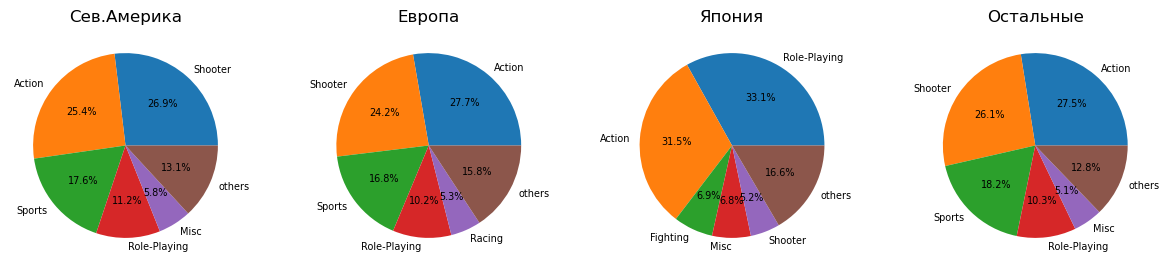

In [62]:
# создаём функцию для группировки данных и выделения из столбцов для диаграмм
def rund2(reg_sales): 
    f3 = df10.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], \
                      aggfunc=['sum'])['sum'].sort_values(by=reg_sales, ascending=False)
    r_sales = list(f3[reg_sales])
    s = sum(r_sales[5:])
    r_sales = list(r_sales[:5])
    r_sales.append(s)
    gen = list(f3.index[:5])
    gen.append('others')
    return r_sales, gen


fig_1 = plt.figure(figsize=(15,3)) # размеры поля, куда будут выводиться диаграммы
ax1 = fig_1.add_subplot(1,4,1) # расположение диаграмм в клетках
ax2 = fig_1.add_subplot(1,4,2)
ax3 = fig_1.add_subplot(1,4,3)
ax4 = fig_1.add_subplot(1,4,4)

# вызов функции и взятие из кортежа цифр и платформ
ax1.pie(rund2('na_sales')[0], labels=rund2('na_sales')[1],autopct='%1.1f%%',textprops={'fontsize': 7}) 
ax2.pie(rund2('eu_sales')[0], labels=rund2('eu_sales')[1],autopct='%1.1f%%',textprops={'fontsize': 7})
ax3.pie(rund2('jp_sales')[0], labels=rund2('jp_sales')[1],autopct='%1.1f%%',textprops={'fontsize': 7})
ax4.pie(rund2('other_sales')[0], labels=rund2('other_sales')[1],autopct='%1.1f%%',textprops={'fontsize':7})

ax1.set_title('Сев.Америка') # заголовки по каждой диаграмме
ax2.set_title('Европа')
ax3.set_title('Япония')
ax4.set_title('Остальные');
print('\nTOP-5 жанров по 3-м регионам и "остальным" (2014+ годы выпуска)');

- В Северной Америке лидируют жанры Shooter и Action. В европе лидируют жанры Action и Shooter. В Японии лидеры Role-Playing и Action. В остальном мире лидируют жанры Action и Shooter. Жанр Sports популярен везде (3-е место), но не в Японии, у японцев на 3-м месте "остальные" жанры.

#### Влияние рейтинга ESRB на продажи в отдельных регионах.

Поскольку около трети игр не имеют американского добровольного рейтинга ESRB, в разделе дополнительной обработки на места пропусков в это поле было записано значение "no_esrb".

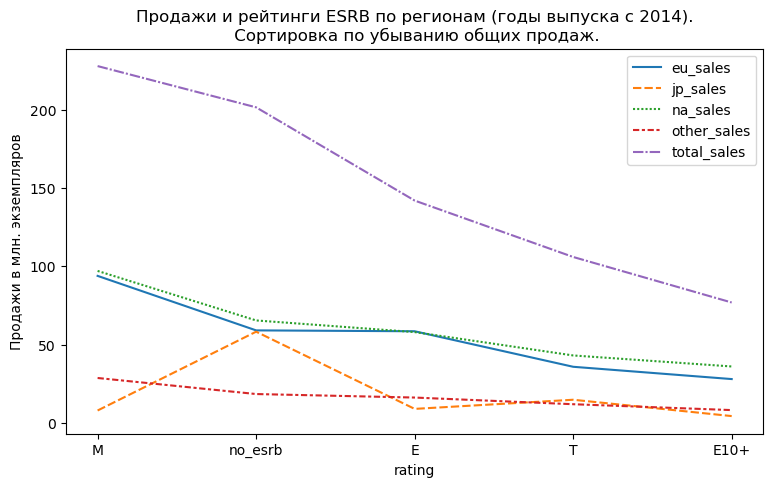

In [63]:
# собираем сводную таблицу по рейтингу ESRB

fg = (df10.pivot_table(index=['rating'],values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
      aggfunc=['sum']))['sum']
fg = fg.sort_values(by='total_sales', ascending=False) # сортируем данные по общим продажам
plt.figure(figsize = (9, 5)) 
plt.ylabel('Продажи в млн. экземпляров')
plt.title('Продажи и рейтинги ESRB по регионам (годы выпуска c 2014).\n Сортировка по убыванию общих продаж.')
sns.lineplot(data=fg); 

- По рейтингам ESRB североамериканские и европейские данные практически совпадают. Остальные регионы эту тенденцию практически повторяют, только в меньших масштабах (кривая смещена вниз относителдьно Европы и Северной Америки). 
- А японский рынок имеет свою специфику: у его линии имеется пик в области программ с меткой no_esrb.
- Метка no_esrb имеет почти один и тот же уровень продаж на европейском, североамериканском и японском рынках.

In [64]:
# Комментарий ревьюера
temp = df10.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_esrb    764
T          283
M          268
E          238
E10+       196
Name: rating, dtype: int64

### Шаг 5. Проверка гипотез.

Краткое пояснение процесса.
1. Процесс состоит в сопоставлении вероятности нулевой гипотезы H0 (обычно это равенство средних значений двух выборок) и альтернативной гипотезы H1, которая в терминах теории вероятности является дополнением H0 (в сумме их вероятности равны 1).
2. Функция ttest расчитывает P-value.  P-value – это вероятность получить значение статистики критерия, равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. 
3. В наших экспериментах расчитывается P-value для двух выборок и далее, если эта вероятность (вероятность равенства, совпадения) меньше порогового значения alpha - мы отвергаем нулевую гипотезу и принимаем альтернативную.

#### Гипотеза:	средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [65]:
df10['platform'].unique() # коды названий платформ в нашей базе

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PS2', 'X360', 'PC', 'Wii',
       'PSV', 'DS', 'XB', 'GC', 'GBA', 'PSP'], dtype=object)

In [66]:
# полагаем, что Xbox One - это XOne, выделим 2 коллекции для анализа. NaN исключим
# поскольку часть чисел не имеет точки и воспронимается как целые, переведём во float

x1 = df10[df10['user_score'].notna()].query('platform == "XOne"')['user_score']
x2 = df10[df10['user_score'].notna()].query('platform == "PC"')['user_score']

```
H_0: Средний пользовательский рейтинг платформы Xbox One равен рейтингу платформы PC
H_1: Средний пользовательский рейтинг платформы Xbox One НЕ равен рейтингу платформы PC
alpha = 0.01
```

In [67]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(x1, x2, equal_var=False)
# alpha = задаём значение уровня значимости
alpha = 0.01
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу 


In [68]:
# выведем средние по оценкам пользователей Xbox One и PC

round(x1.mean(), 2), round(x2.mean(), 2) 

(6.59, 6.3)

Статистический анализ выборок (их среднего и дисперсий) показывает, что Средний пользовательский рейтинг платформы Xbox One равен рейтингу платформы PC. Измеренное несовпадение их средних статистически вероятно (не ниже порога alpha).

#### Гипотеза:	средние пользовательские рейтинги жанров Action и Sports - разные.

In [69]:
# выберем из датафрейма 2 коллекции с данными для статистического анализа

x1 = df10[df10['user_score'].notna()].query('genre == "Action"')['user_score']
x2 = df10[df10['user_score'].notna()].query('genre == "Sports"')['user_score']

```
H_0: Средний пользовательский рейтинг жанра Action равен рейтингу жанра Sports
H_1: Средний пользовательский рейтинг жанра Action НЕ равен рейтингу жанра Sports
alpha = 0.01
```

In [70]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(x1, x2, equal_var=False)
# alpha = задаём значение уровня значимости
alpha = 0.01
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.025500080084729e-13
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

In [71]:
# выведем средние по оценкам пользователей жанров Action и Sports

round(x1.mean(), 2), round(x2.mean(), 2) 

(6.74, 5.33)

Статистический анализ выборок (их среднего и дисперсий) показывает, что Средний пользовательский рейтинг жанра Action НЕ равен рейтингу жанра Sports. Измеренное несовпадение их средних статистически вероятно (не ниже порога alpha 0.01). То есть гипотеза, объявленная в заголовке, верна (H0 была её противоположностью, дополнением).

## Выводы.

Как видно из приведённых выше графиков, не только количество игр, но и продажи как таковые, существенно возрастают с года релиза 1995 и достигают максимума для релизов 2009-го года. К настоящему моменту (2016-й год) рынок в финансовом плане падает.
Период 1980-1995 можно считать этапом плавного развития, а год 1995-й - это старт бума компьютерных игр, который ушёл в прошлое.

Наиболее вероятно, что в следующем году лидерство будет оставаться за платформами PS4 и XOne, но 3DS в ближайшие годы сможет составить им конкуренцию, поскольку её график имеет более пологий вид.
WiiU росла в периоде 2011-2012 и сравнялась по продажам с PS3. Так что это тоже сильный игрок, который может бороться со следующего года за место в первой тройке.

На диаграмме размаха PS4 иXOne имеют большие продажи за счёт выбросов (см. диаграмму "Платформы - лидеры на 2016й год (релизы 2014+)"). То есть на них имеются "игры-звёзды", дающие вклад в валовые продажи, а вот вторая половина списка - это стабильные середнячки, уже без выбросов.
На платформе Wii и WiiU медианное значение довольно высокое для нелидеров, то есть продажи обеспечиваются меньшим количеством при большей цене, аналогично для платформ PS2 и DS.


Корреляция для 9-ти платформ лидеров продаж в разрезе продажи – оценки критиков. Для GBA, N64, PS данных для расчёта недостаточно. Для платформ DS и PS2 имеется всего по 3 оценки, в первом случае корреляция очень высокая отрицательная, во втором высокая положительная. Для платформ 3DS, PC, PS4, PS3 корреляция продаж с оценками критиков слабая, очень слабая, слабая и средняя.

Корреляция для 9-ти платформ лидеров продаж в разрезе продажи – оценки пользователей. Для GBA, DS, N64, PS, PS2 данных слишком мало. Для PC, PS3, PS4 корреляция очень слабая, причём отрицательная. Лишь для 3DS корреляция положительная, но тоже очень слабая.

На диаграмме "ящик с усами" Shooter в период 2014-2016 года явный лидер, его медиана опережает 3-й квартиль практически у всех других жанров. Далее с заметным отставанием идёт жанр Sports.
Внутри медиан платформа WiiU лидер в Racing, Fighting, Sports. По Shooter лидер XOne, в жанре Misc лидер Wii.
По суммам продаж лидирует жанр Action, Shooter на втором месте. PS4 лидирует по жанрам Action, Shooter, Sports, а в жанре Role-Playing пропускает на первое место 3DS.

В Северной Америке лидирует PS4, на втором месте XOne. В Европе однозначный лидер PS4, за ней с отставанием XOne. В Японии 3DS абсолютный лидер, за ней с отставанием PS4 и PSV. В остальных регионах суммарно лидер PS4 (как в Европе) и за ней с отрывом XOne, а PS3 на 3-м месте. Интересно, что в Японии практически весь рынок разобран под 5 лидеров, others занимают очень малую долю.

В Северной Америке лидируют жанры Shooter и Action. В европе лидируют жанры Action и Shooter. В Японии лидеры Role-Playing и Action. В остальном мире лидируют жанры Action и Shooter. Жанр Sports популярен везде (3-е место), но не в Японии, у японцев на 3-м месте "остальные" жанры.

По рейтингам ESRB североамериканские и европейские данные практически совпадают. Остальные регионы эту тенденцию практически повторяют, только в меньших масштабах (кривая смещена вниз относителдьно Европы и Северной Америки).
А японский рынок имеет свою специфику: у его линии имеется пик в области программ с меткой no_esrb.
Метка no_esrb имеет почти один и тот же уровень продаж на европейском, североамериканском и японском рынках.


Статистика. "Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые" принята с альфа 0.01. Гипотеза: "средние пользовательские рейтинги жанров Action и Sports - разные" принята с альфа 0.01.